### Olzhas Akylbekov

*Importing* *libraries*

In [0]:
import torch  # PyTorch is an free ML library developed by Facebook. It is mostly used to natural language processing purposes
from torch.autograd import Variable #A Variable wraps a Tensor which supports nearly all the API’s defined by a Tensor
import numpy as np # This is an open-source module for python that provides general mathematical and numerical operations in the form of pre-compiled, fast functions
import torch.functional as F #
import torch.nn.functional as F #Neural networks can be constructed using the torch.nn package
import matplotlib.pyplot as plt # for plotting the result
from sklearn.decomposition import PCA # reducing dimensions
from sklearn.manifold import TSNE


***Assign our text  to corpus from Wiki from*** https://en.wikipedia.org/wiki/History_of_Kazakhstan  ***the part - "Internal Soviet migration"***

In [0]:
corpus = ["Many Soviet citizens from the western regions of the USSR and a great deal of Soviet industry relocated to the Kazakh SSR during World War II, when Axis armies captured or threatened to capture western Soviet industrial centres. Groups of Crimean Tatars, Germans, and Muslims from the North Caucasus were deported to the Kazakh SSR during the war because it was feared that they would collaborate or had collaborated with the Germans. Many Poles from eastern Poland were deported to the Kazakh SSR, and local people shared their food with the new arrivals. "
"Many more non-Kazakhs arrived between 1953 and 1965, during the Virgin Lands Campaign of Soviet Premier Nikita Khrushchev (in office 1958–1964). That program saw huge tracts of Kazakh SSR grazing land cultivated for wheat and other cereal grains. More settlement occurred in the late 1960s and 1970s, when the Soviet government paid bonuses to workers participating in a program to relocate Soviet industry closer to Central Asia's coal, gas, and oil deposits. By the 1970s the Kazakh SSR was the only Soviet republic in which the eponymous nationality was a minority, due to immigration and the decimation of the nomadic Kazakh population."]

Tokening the words

In [122]:
tokens = []
for i in range (len(corpus)):
    sents = corpus[i].split(".")    
    for j in range(len(sents)):
        tokens = tokens + sents[j].lower().split(" ")
my_dict=tokens
my_dict[10:20]

['and',
 'a',
 'great',
 'deal',
 'of',
 'soviet',
 'industry',
 'relocated',
 'to',
 'the']

Creating functions to convert the words to index and vice versa

In [0]:
def word2idx(token):
    index = my_dict.index(token)
    return index
def idx2word(index):
    word = my_dict[index]
    return word

Showing the index of the word **citizens**:

In [124]:
word2idx("citizens")

2

Showing the word with **index 6**:

In [125]:
idx2word(6)

'regions'

Creating the Co-occurance matrix calcilation by numpy 

In [126]:
CoM=np.zeros((len(my_dict),len(my_dict)))
s = len(tokens)-1
for idx in range(s):
  index2=word2idx(tokens[idx+1])
  index1 = word2idx(tokens[idx])
  print(tokens[idx],tokens[idx+1])
  CoM[index1,index2] +=1

print ('Shape of Co-occurance Matrix ', CoM.shape)

many soviet
soviet citizens
citizens from
from the
the western
western regions
regions of
of the
the ussr
ussr and
and a
a great
great deal
deal of
of soviet
soviet industry
industry relocated
relocated to
to the
the kazakh
kazakh ssr
ssr during
during world
world war
war ii,
ii, when
when axis
axis armies
armies captured
captured or
or threatened
threatened to
to capture
capture western
western soviet
soviet industrial
industrial centres
centres 
 groups
groups of
of crimean
crimean tatars,
tatars, germans,
germans, and
and muslims
muslims from
from the
the north
north caucasus
caucasus were
were deported
deported to
to the
the kazakh
kazakh ssr
ssr during
during the
the war
war because
because it
it was
was feared
feared that
that they
they would
would collaborate
collaborate or
or had
had collaborated
collaborated with
with the
the germans
germans 
 many
many poles
poles from
from eastern
eastern poland
poland were
were deported
deported to
to the
the kazakh
kazakh ssr,
ssr, and
and

**Principal component analysis** - reducing dimensions

In [0]:
def return_matrix(random_words,dim =15):
    word_matrix = np.random.randn(len(random_words),dim)
    i = 0
    for word in random_words:
        word_matrix[i] = word2idx(word)
        i +=1
    return word_matrix

In [128]:
random_words =[  'regions', 'of', 'the', 'ussr','and', 'a', 'great', 'deal', 'of', 'soviet', 'industry', 'relocated', 'to', 'the']
matrix_return = return_matrix(random_words, 10)
matrix_return[:10,:10]

array([[ 6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
       [ 9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [11., 11., 11., 11., 11., 11., 11., 11., 11., 11.],
       [12., 12., 12., 12., 12., 12., 12., 12., 12., 12.],
       [13., 13., 13., 13., 13., 13., 13., 13., 13., 13.],
       [ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [0]:
pca_ = PCA(n_components = 2)  
data = pca_.fit_transform(matrix_return)

Text(0, 0.5, 'PCA2')

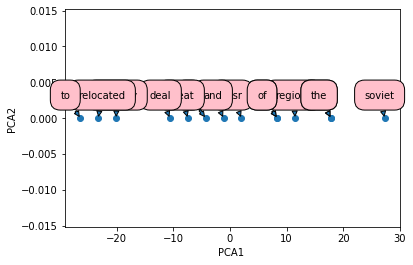

In [152]:
plt.scatter(data[:,0],data[:,1],cmap=plt.get_cmap('Spectral'))
for label,x,y in zip(random_words,data[:,0],data[:,1]):
    plt.annotate(
        label,
        xy=(x,y),
        xytext=(-20, 20),
        textcoords='offset points',
        bbox=dict(boxstyle='round,pad=1', fc='pink', alpha=1),
        arrowprops=dict(arrowstyle = 'simple', connectionstyle='arc3,rad=0')
    )
plt.xlabel('PCA1 ')
plt.ylabel('PCA2')

In [131]:
tsne = TSNE(n_components=2, verbose=1,perplexity=3,method='exact')
tsne_results = tsne.fit_transform(matrix_return)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 14 / 14
[t-SNE] Mean sigma: 5.400876
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.464684
[t-SNE] KL divergence after 1000 iterations: 0.071724


Text(0, 0.5, 'TSNE2')

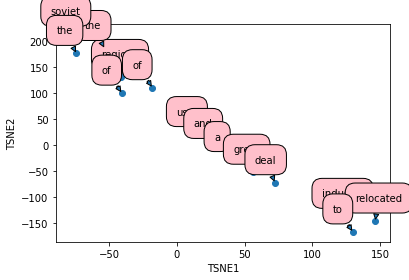

In [153]:
plt.scatter(tsne_results[:,0],tsne_results[:,1],cmap=plt.get_cmap('Spectral'))
for label,x,y in zip(random_words,tsne_results[:,0],tsne_results[:,1]):
    plt.annotate(
        label,
        xy=(x,y),
        xytext=(-20, 20),
        textcoords='offset points',
        bbox=dict(boxstyle='round,pad=1', fc='pink', alpha=1),
        arrowprops=dict(arrowstyle = 'simple', connectionstyle='arc3,rad=0')
    )
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')